<a href="https://colab.research.google.com/github/vishnuabarajithan/Machine-Learning-Notebooks/blob/master/Covid19_detection_using_X_ray_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt



In [7]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 18.46 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [8]:
#set the path to the main dir
import os
main_dir= "/content/datasets/Data"

#set the path to the train dir
train_dir= os.path.join(main_dir,'train')

#set the path to the test dir
test_dir= os.path.join(main_dir,'test')


#directory with the training covid images
train_covid_dir=os.path.join(train_dir,'COVID19')

#directory with the training normal images
train_normal_dir=os.path.join(train_dir,'NORMAL')

#directory with the testing covid images
test_covid_dir=os.path.join(test_dir,'COVID19')
#directory with the testing normal image
test_normal_dir=os.path.join(test_dir,'NORMAL')


In [9]:
#print the filenames
train_covid_names= os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names= os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names= os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names= os.listdir(test_normal_dir)
print(test_normal_names[:10])


['COVID19(97).jpg', 'COVID19(122).jpg', 'COVID19(37).jpg', 'COVID19(559).jpg', 'COVID-19 (13).jpeg', 'COVID19(175).jpg', 'COVID19(388).jpg', 'COVID19(6).jpg', 'COVID19(434).jpg', 'COVID19(76).jpg']
['NORMAL(1058).jpg', 'NORMAL(1113).jpg', 'NORMAL(976).jpg', 'NORMAL(1147).jpg', 'NORMAL(1041).jpg', 'NORMAL(995).jpg', 'NORMAL(1241).jpg', 'NORMAL(579).jpg', 'NORMAL(740).jpg', 'NORMAL(865).jpg']
['COVID19(343).jpg', 'COVID19(152).jpg', 'COVID19(568).jpg', 'COVID19(35).jpg', 'COVID19(425).jpg', 'COVID-19 (865).jpg', 'COVID-19 (804).jpg', 'COVID19(552).jpg', 'COVID19(383).jpg', 'COVID-19 (313).jpg']
['NORMAL(833).jpg', 'NORMAL(1510).jpg', 'NORMAL(845).jpg', 'NORMAL(301).jpg', 'NORMAL(199).jpg', 'NORMAL(618).jpg', 'NORMAL(42).jpg', 'NORMAL(327).jpg', 'NORMAL(486).jpg', 'NORMAL(141).jpg']


In [10]:
#print the total no of images present in each dir
print("Total images present in the training set:",len(train_covid_names+train_normal_names))
print("Total images present in the test set:",len(test_covid_names+test_normal_names))

Total images present in the training set: 1811
Total images present in the test set: 484


['/content/datasets/Data/train/COVID19/COVID19(97).jpg', '/content/datasets/Data/train/COVID19/COVID19(122).jpg', '/content/datasets/Data/train/COVID19/COVID19(37).jpg', '/content/datasets/Data/train/COVID19/COVID19(559).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (13).jpeg', '/content/datasets/Data/train/COVID19/COVID19(175).jpg', '/content/datasets/Data/train/COVID19/COVID19(388).jpg', '/content/datasets/Data/train/COVID19/COVID19(6).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1058).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1113).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(976).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1147).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1041).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(995).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1241).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(579).jpg']


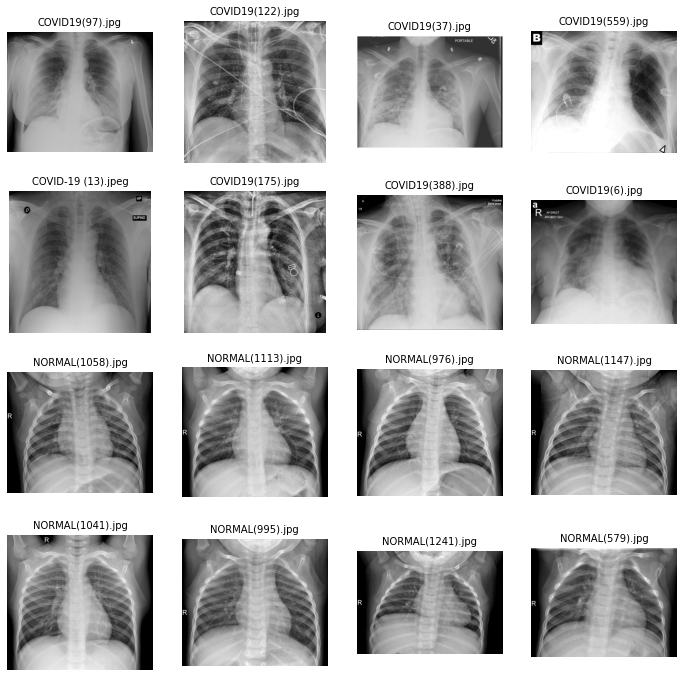

In [11]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows=4
cols=4
#set the figure size
fig=plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
covid_pic= [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]
normal_pic=[os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]

#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list=covid_pic+normal_pic

for i, img_path in enumerate(merged_list):
  data=img_path.split('/',6)[6]
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()
  

Data Preprocessing & Augmentation

In [12]:
# generate training,testing and validation batches 
dgen_train=ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
dgen_validation= ImageDataGenerator(rescale=1./255)
dgen_test= ImageDataGenerator(rescale=1./255)

train_generator= dgen_train.flow_from_directory(train_dir,target_size=(150,150),
                                                  subset='training',
                                                  batch_size=32,
                                                  class_mode='binary')
validation_generator= dgen_train.flow_from_directory(train_dir,target_size=(150,150),
                                                  subset='validation',
                                                  batch_size=32,
                                                  class_mode='binary')
test_generator= dgen_test.flow_from_directory(test_dir,target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')
  
  


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [13]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [14]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

CNN

In [15]:
model=Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME', activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME', activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
model.add(Dropout(0.5))
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dense(1,activation='sigmoid'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

Compile & Train the Model

In [16]:
#compile the model
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
#train the model
history=model.fit(train_generator,epochs=30, validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 79s 1s/step - loss: 1.2122 - accuracy: 0.7155 - val_loss: 0.4608 - val_accuracy: 0.8950
Epoch 2/30
46/46 [==============================] - 48s 1s/step - loss: 0.2355 - accuracy: 0.9080 - val_loss: 0.2523 - val_accuracy: 0.9613
Epoch 3/30
46/46 [==============================] - 48s 1s/step - loss: 0.1420 - accuracy: 0.9591 - val_loss: 0.2814 - val_accuracy: 0.9724
Epoch 4/30
46/46 [==============================] - 48s 1s/step - loss: 0.1720 - accuracy: 0.9340 - val_loss: 0.1204 - val_accuracy: 0.9613
Epoch 5/30
46/46 [==============================] - 48s 1s/step - loss: 0.1762 - accuracy: 0.9453 - val_loss: 0.1368 - val_accuracy: 0.9558
Epoch 6/30
46/46 [==============================] - 47s 1s/step - loss: 0.1482 - accuracy: 0.9508 - val_loss: 0.1280 - val_accuracy: 0.9669
Epoch 7/30
46/46 [==============================] - 47s 1s/step - loss: 0.1452 - accuracy: 0.9507 - val_loss: 0.1912 - val_accuracy: 0.9171
Epoch 8/30
46/46 [==

 Performance Evaluation

In [18]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

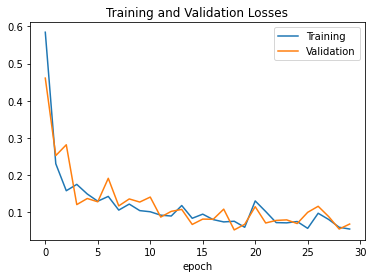

In [19]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

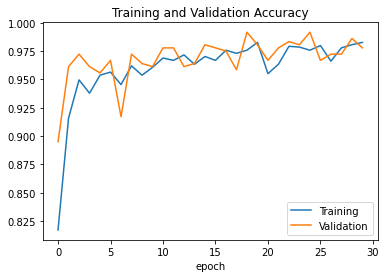

In [20]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [21]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
y_pred=model.predict(test_generator)


In [23]:
y_p=[]
for i in y_pred:
  if i >= 0.9:
    i=1
  else:
    i=0
  y_p.append(i)
np.array(y_p)

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(test_generator.classes, y_p))

[[ 71  96]
 [109 208]]


In [26]:
# get the test acuarcy and loss
test_loss, test_acc=model.evaluate(test_generator)
print('test_loss : {} test acc {}'.format(test_loss,test_acc))


16/16 [==============================] - 10s 616ms/step - loss: 0.0626 - accuracy: 0.9793
test_loss : 0.06264613568782806 test acc 0.9793388247489929


In [27]:
model.save("/content/covid.h5")
print("Saved model to disk")

Saved model to disk


In [28]:
from keras.models import load_model

In [29]:
model1 = load_model('/content/covid.h5')

In [30]:
from google.colab import files
from keras.preprocessing import image
uploaded= files.upload()
for filename in uploaded.keys():
  img_path='/content/'+filename
  img= image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction= model1.predict(images)
  print(filename)

  if prediction==0:
    print('Covid Detected')

  else:
    print('Your report is normal')
  


KeyboardInterrupt: ignored

In [31]:
!pip install voila

In [32]:
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
